# Modelos de clasificación

**Autor/es:**
+ Cristobal Betancurt Palma
+ Jonathan Olivares Garces

**Correos Electrónicos:**
+ cristobal.betancurt2101@alumnos.ubiobio.cl
+ jonathan.olivares2101@alumnos.ubiobio.cl

**Fecha de Creación:** Octubre de 2024  
**Versión:** 1.0

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 2 - parte 1 de la asignatura de Inteligencia Artificial de la carrera de Ingeniería civil en informática de la Universidad del Bío Bío - Sede Concepción

# Carga de datos

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score,  classification_report, roc_auc_score
from sklearn.feature_selection import SelectKBest

from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.pipeline import Pipeline

from IPython.display import display
from collections import Counter
from sklearn.preprocessing import LabelBinarizer
import json



In [74]:
# Se carga el dataset de empleados
datos = pd.read_csv("empleados.csv", sep=",")
datos.shape

(74498, 24)

 #### Tenemos 74498 datos con  24 columnas que representa una variable cada una

# Metodología CRISP-DM

## Fase 2 - Comprensión de los datos

In [75]:
datos.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [76]:
# Obtiene detalles de las columnas 
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents  

Representa la cantidad de variables existentes

In [77]:

# Variables cualitiativas categoricas   
datos.select_dtypes(include=['object']).nunique()


Gender                      2
Job Role                    5
Work-Life Balance           4
Job Satisfaction            4
Performance Rating          4
Overtime                    2
Education Level             5
Marital Status              3
Job Level                   3
Company Size                3
Remote Work                 2
Leadership Opportunities    2
Innovation Opportunities    2
Company Reputation          4
Employee Recognition        4
Attrition                   2
dtype: int64

Se filtran las variables tipo object o cualitativas categoricas, se tienen 8 variables numericas y 16 tipo object

In [78]:
#Revisar valores nulos
datos.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

No se tiene ningun valor null 

In [79]:
#Se crea una copia de los datos
datos_dummies = datos
datos_dummies["Attrition"] = datos_dummies["Attrition"].replace({"Left": 1, "Stayed": 0})
datos_dummies["Employee Recognition"] = datos_dummies["Employee Recognition"].replace({"Very High": 4, "High": 3, "Low": 2, "Medium": 1})
datos_dummies["Company Reputation"] = datos_dummies["Company Reputation"].replace({"Excellent": 4, "Fair": 3, "Good": 2, "Poor": 1})
datos_dummies["Innovation Opportunities"] = datos_dummies["Innovation Opportunities"].replace({"No": 2, "Yes": 1})
datos_dummies["Leadership Opportunities"] = datos_dummies["Leadership Opportunities"].replace({"No": 2, "Yes": 1})
datos_dummies["Remote Work"] = datos_dummies["Remote Work"].replace({"No": 2, "Yes": 1})
datos_dummies["Company Size"] = datos_dummies["Company Size"].replace({"Large": 3, "Medium": 2, "Small": 1})
datos_dummies["Job Level"] = datos_dummies["Job Level"].replace({"Entry": 3, "Mid": 2, "Senior": 1})
datos_dummies["Marital Status"] = datos_dummies["Marital Status"].replace({"Divorced": 3, "Married": 2, "Single": 1})
datos_dummies["Education Level"] = datos_dummies["Education Level"].replace({"Associate Degree": 5, "Bachelor’s Degree": 4, "High School": 3, "Master’s Degree": 2, "PhD": 1})
datos_dummies["Overtime"] = datos_dummies["Overtime"].replace({"No": 2, "Yes": 1})
datos_dummies["Performance Rating"] = datos_dummies["Performance Rating"].replace({"Average": 4, "Below Average": 3, "High": 2, "Low": 1})
datos_dummies["Job Satisfaction"] = datos_dummies["Job Satisfaction"].replace({"High": 4, "Low": 3, "Medium": 2, "Very High": 1})
datos_dummies["Work-Life Balance"] = datos_dummies["Work-Life Balance"].replace({"Excellent": 4, "Fair": 3, "Good": 2, "Poor": 1})
datos_dummies["Job Role"] = datos_dummies["Job Role"].replace({"Education": 5, "Finance": 4, "Healthcare": 3, "Media": 2, "Technology": 1})
datos_dummies["Gender"] = datos_dummies["Gender"].replace({"Female": 2, "Male": 1})

C:\Users\iepte\AppData\Local\Temp\ipykernel_12884\3587396801.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_dummies["Attrition"] = datos_dummies["Attrition"].replace({"Left": 1, "Stayed": 0})
C:\Users\iepte\AppData\Local\Temp\ipykernel_12884\3587396801.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_dummies["Employee Recognition"] = datos_dummies["Employee Recognition"].replace({"Very High": 4, "High": 3, "Low": 2, "Medium": 1})
C:\Users\iepte\AppData\Local\Temp\ipykernel_12884\3587396801.py:5: FutureWarning: 

---- 
$\textbf{Observacion}$
---

Se transforman los datos cualitativos o de tipo object a cuantitativos o tipo int, esto lo hacemos en esta seccion para asi poder analizar de mejor manera los graficos 

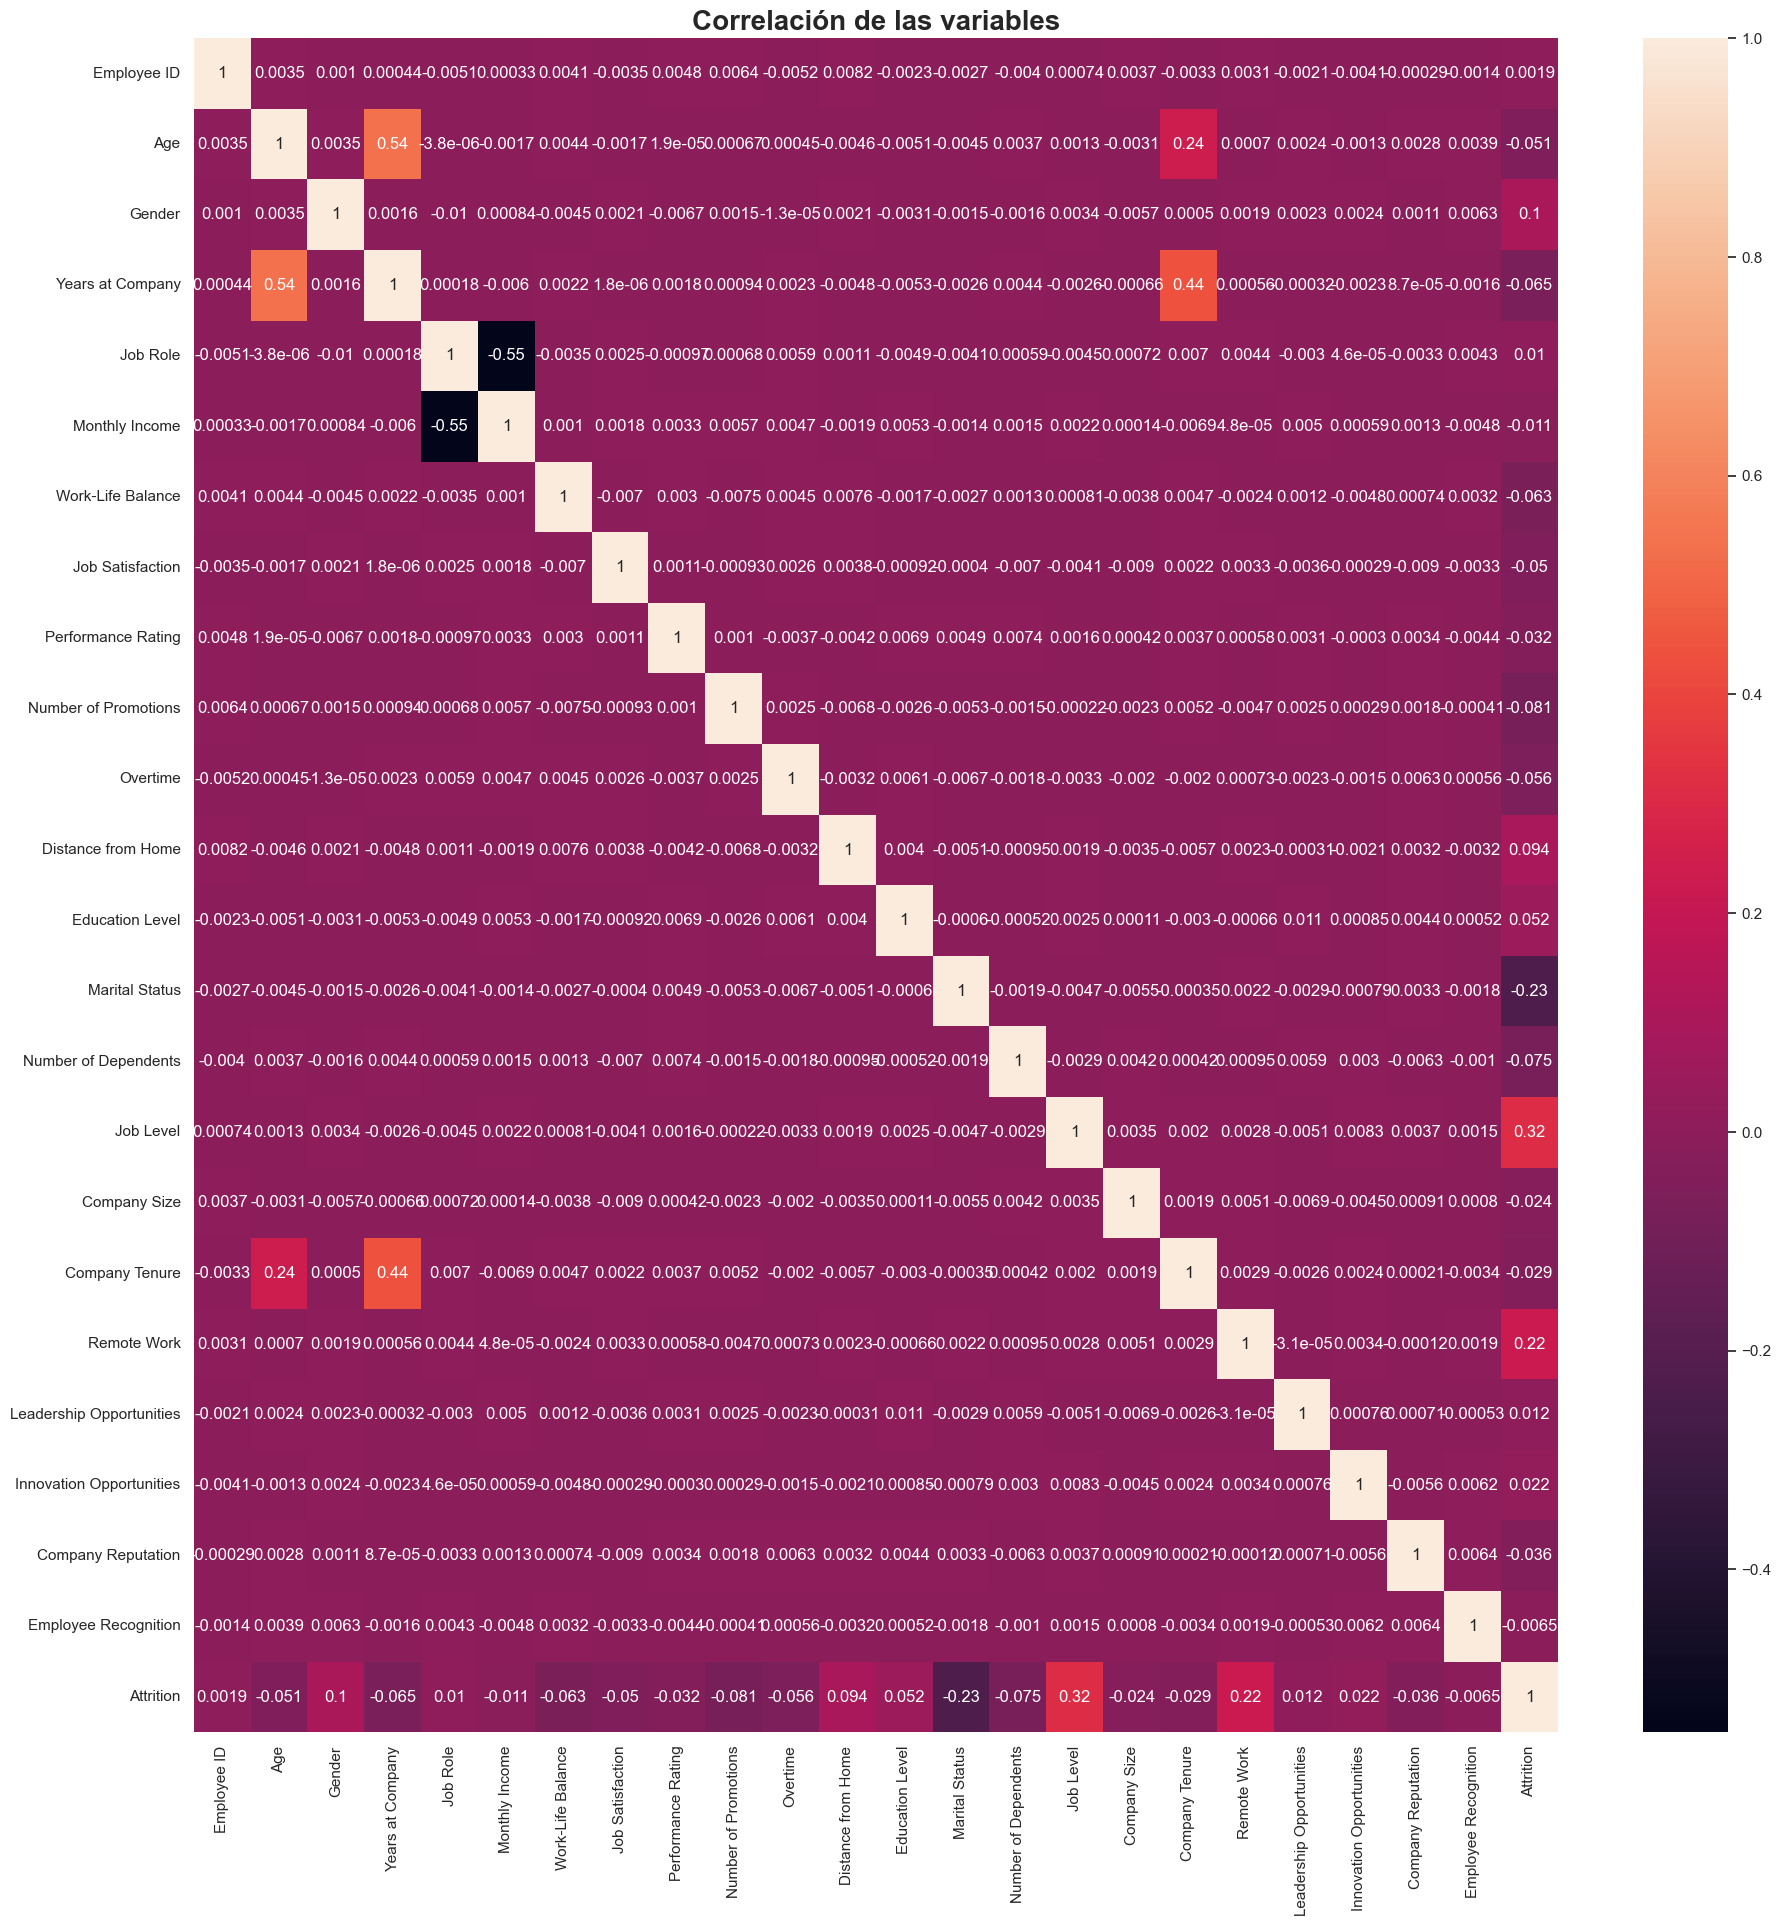

In [80]:
plt.figure(figsize=(22,22))
sns.heatmap(datos.corr(), annot=True)
plt.title("Correlación de las variables", fontsize=20, fontweight="bold")
plt.show()

---
$\textbf{Analisis}$

----

Comentarios acerca de la matriz:

+ 14 de 24 Variables presentan una correlacion negativa con la variable objetivo
+ 10 de 24 Variables presentan una correlacion Positiva con la variable objetivo

----
## $\textbf{Analisis para las variables que eran originalmente tipo INT o cuantitativas} $
---

# EDAD

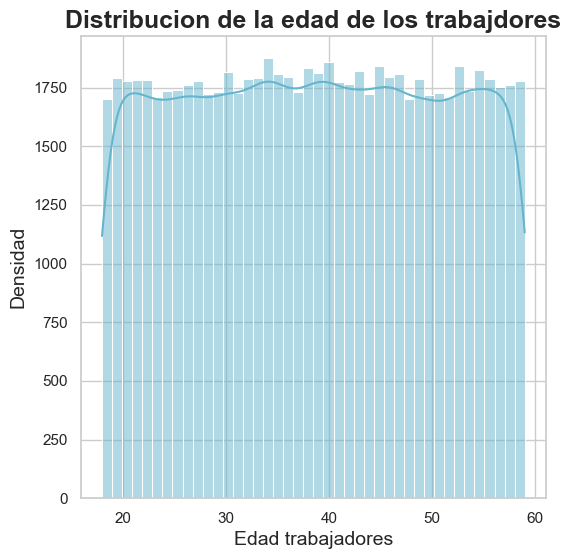

In [81]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(6, 6))
ax = sns.histplot(datos['Age'], kde = True, color = 'c')
plt.title('Distribucion de la edad de los trabajdores', fontsize = 18, fontweight="bold")
plt.xlabel("Edad trabajadores", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.show()

In [82]:
pd.DataFrame(datos['Age'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Age,74498.0,38.529746,12.083456,18.0,28.0,39.0,49.0,59.0


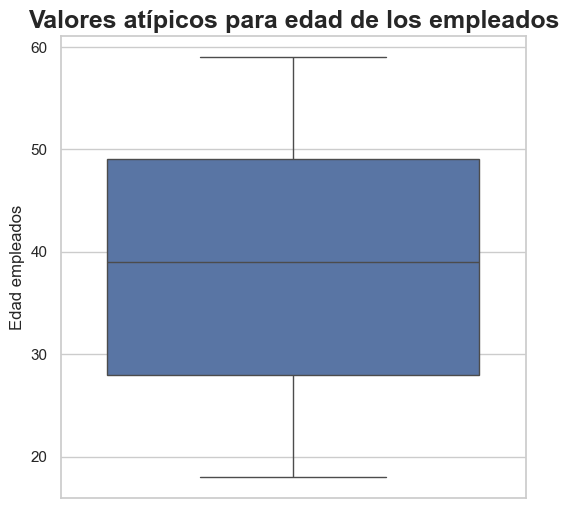

In [83]:
plt.figure(figsize=(6,6))
sns.boxplot(y=datos['Age'])
plt.title("Valores atípicos para edad de los empleados", fontsize=18, fontweight="bold")
plt.ylabel("Edad empleados")
plt.show()

---
$\textbf{Analisis}$

----

Comentarios de los graficos:

+ En el Primer graficos se observa la distribucion de los datos para la variable mencionada 
+ En el grafico de abajo se muestran los outliers o valores atipicos para la variable mencionada la cual no presenta outliers

# Años en la compañia

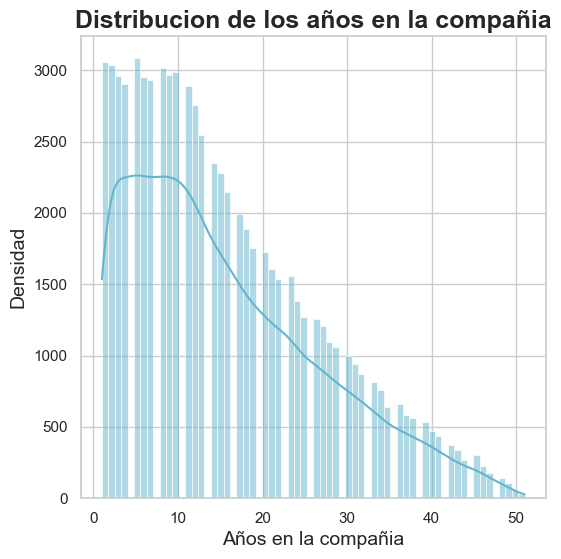

In [84]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(6, 6))
ax = sns.histplot(datos['Years at Company'], kde = True, color = 'c')
plt.title('Distribucion de los años en la compañia', fontsize = 18, fontweight="bold")
plt.xlabel("Años en la compañia", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.show()

In [85]:
pd.DataFrame(datos['Years at Company'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Years at Company,74498.0,15.721603,11.223744,1.0,7.0,13.0,23.0,51.0


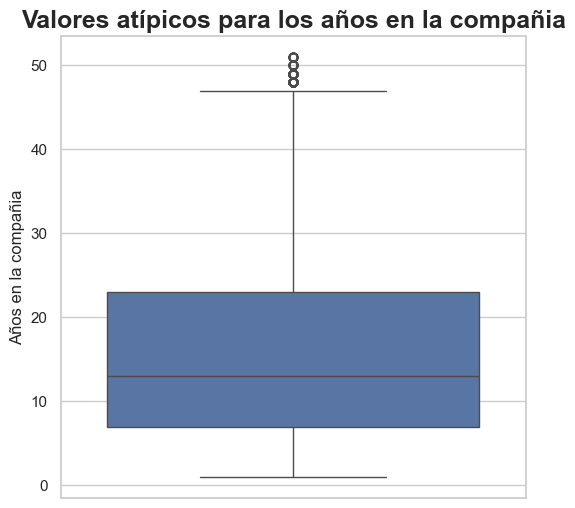

In [86]:
plt.figure(figsize=(6,6))
sns.boxplot(y=datos['Years at Company'])
plt.title("Valores atípicos para los años en la compañia", fontsize=18, fontweight="bold")
plt.ylabel("Años en la compañia")
plt.show()

---
$\textbf{Analisis}$

----

Comentarios de los graficos:

+ En el Primer graficos se observa la distribucion de los datos para la variable mencionada 
+ En el grafico de abajo se muestran los outliers o valores atipicos para la variable mencionada la cual presenta outliers

# Monthly Income

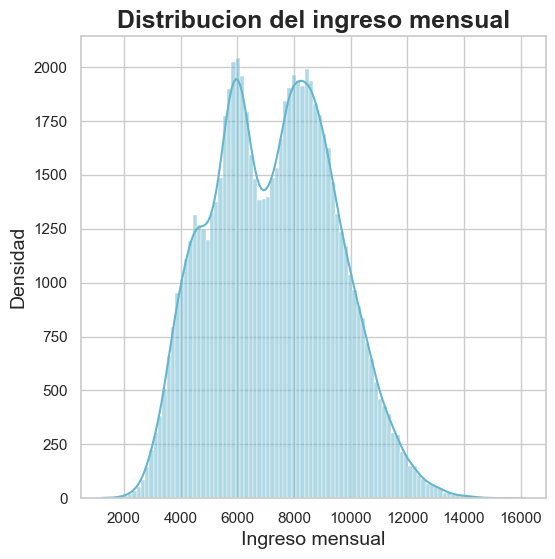

In [87]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(6, 6))
ax = sns.histplot(datos['Monthly Income'], kde = True, color = 'c')
plt.title('Distribucion del ingreso mensual', fontsize = 18, fontweight="bold")
plt.xlabel("Ingreso mensual", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.show()

In [88]:
pd.DataFrame(datos['Monthly Income'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Monthly Income,74498.0,7299.379514,2152.508566,1226.0,5652.0,7348.0,8876.0,16149.0


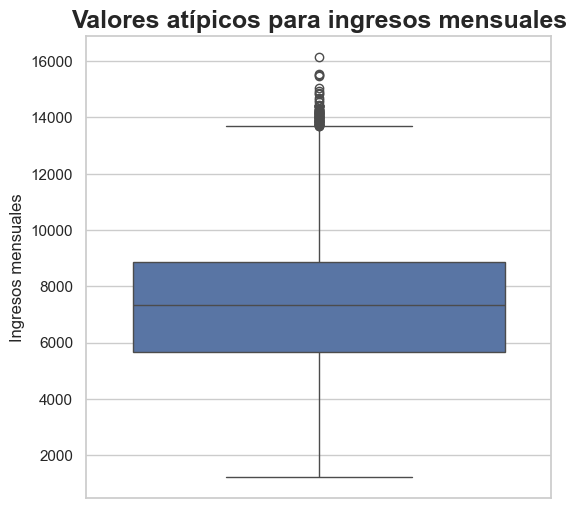

In [89]:
plt.figure(figsize=(6,6))
sns.boxplot(y=datos['Monthly Income'])
plt.title("Valores atípicos para ingresos mensuales", fontsize=18, fontweight="bold")
plt.ylabel("Ingresos mensuales")
plt.show()

---
$\textbf{Analisis}$

----

Comentarios de los graficos:

+ En el Primer graficos se observa la distribucion de los datos para la variable mencionada 
+ En el grafico de abajo se muestran los outliers o valores atipicos para la variable mencionada la cual si presenta outliers

# Number of Promotions

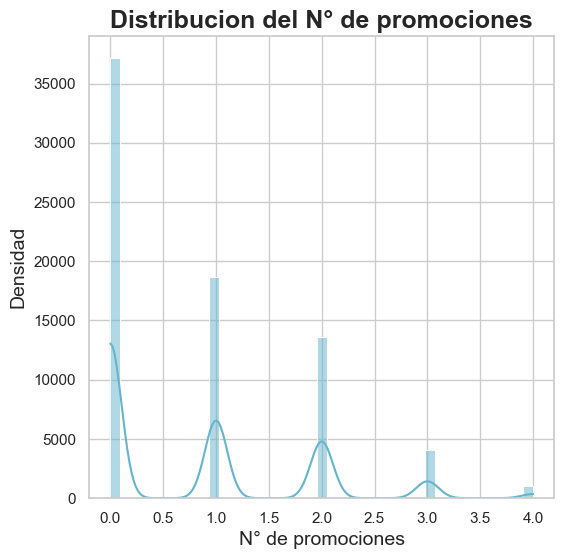

In [90]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(6, 6))
ax = sns.histplot(datos['Number of Promotions'], kde = True, color = 'c')
plt.title('Distribucion del N° de promociones', fontsize = 18, fontweight="bold")
plt.xlabel("N° de promociones", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.show()

In [91]:
pd.DataFrame(datos['Number of Promotions'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Number of Promotions,74498.0,0.832935,0.995289,0.0,0.0,1.0,2.0,4.0


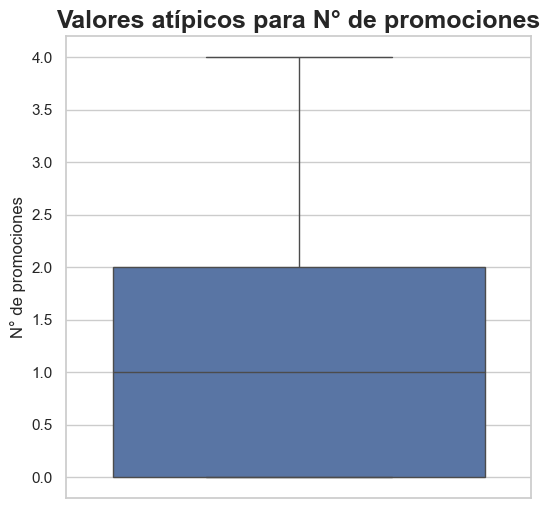

In [92]:
plt.figure(figsize=(6,6))
sns.boxplot(y=datos['Number of Promotions'])
plt.title("Valores atípicos para N° de promociones", fontsize=18, fontweight="bold")
plt.ylabel("N° de promociones")
plt.show()

---
$\textbf{Analisis}$

----

Comentarios de los graficos:

+ En el Primer graficos se observa la distribucion de los datos para la variable mencionada 
+ En el grafico de abajo se muestran los outliers o valores atipicos para la variable mencionada la cual no presenta outliers

# Distance from Home

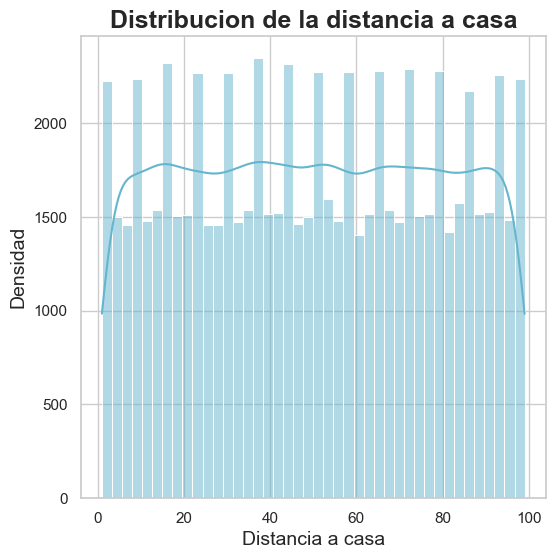

In [93]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(6, 6))
ax = sns.histplot(datos['Distance from Home'], kde = True, color = 'c')
plt.title('Distribucion de la distancia a casa', fontsize = 18, fontweight="bold")
plt.xlabel("Distancia a casa", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.show()

In [94]:
pd.DataFrame(datos['Distance from Home'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Distance from Home,74498.0,49.991584,28.513611,1.0,25.0,50.0,75.0,99.0


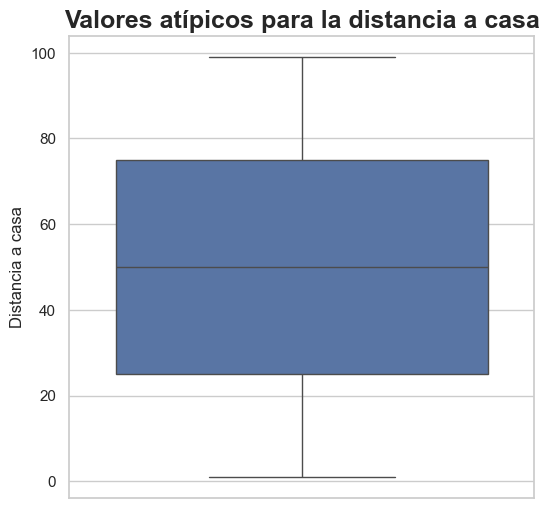

In [95]:
plt.figure(figsize=(6,6))
sns.boxplot(y=datos['Distance from Home'])
plt.title("Valores atípicos para la distancia a casa", fontsize=18, fontweight="bold")
plt.ylabel("Distancia a casa")
plt.show()

---
$\textbf{Analisis}$

----

Comentarios de los graficos:

+ En el Primer graficos se observa la distribucion de los datos para la variable mencionada 
+ En el grafico de abajo se muestran los outliers o valores atipicos para la variable mencionada la cual no presenta outliers

# Number of Dependets

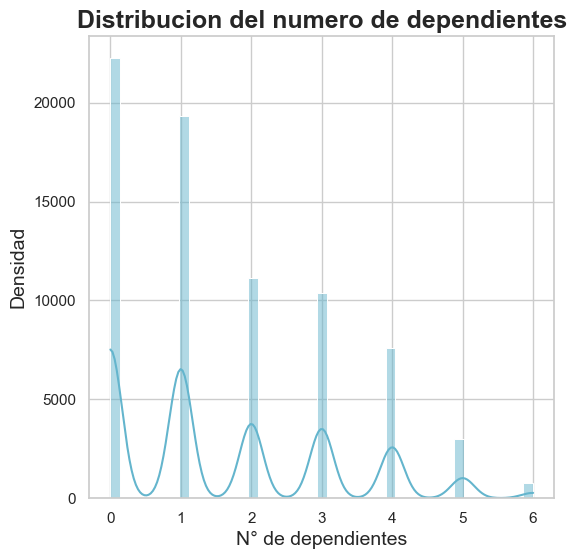

In [96]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(6, 6))
ax = sns.histplot(datos['Number of Dependents'], kde = True, color = 'c')
plt.title('Distribucion del numero de dependientes', fontsize = 18, fontweight="bold")
plt.xlabel("N° de dependientes", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.show()

In [97]:
pd.DataFrame(datos['Number of Dependents'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Number of Dependents,74498.0,1.650326,1.553633,0.0,0.0,1.0,3.0,6.0


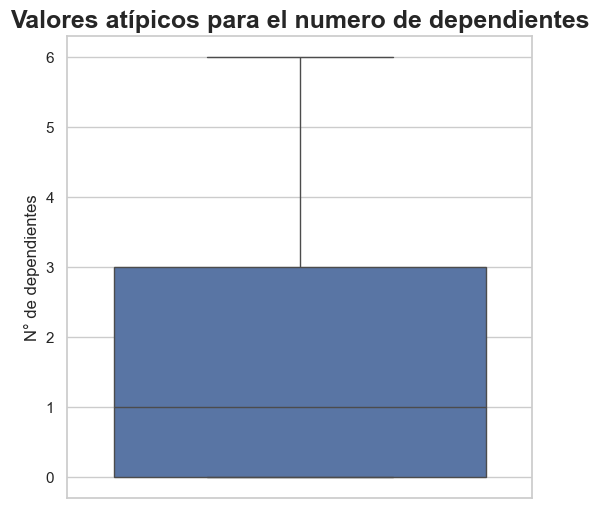

In [98]:
plt.figure(figsize=(6,6))
sns.boxplot(y=datos['Number of Dependents'])
plt.title("Valores atípicos para el numero de dependientes", fontsize=18, fontweight="bold")
plt.ylabel("N° de dependientes")
plt.show()

---
$\textbf{Analisis}$

----

Comentarios de los graficos:

+ En el Primer graficos se observa la distribucion de los datos para la variable mencionada 
+ En el grafico de abajo se muestran los outliers o valores atipicos para la variable mencionada la cual no presenta outliers

# Company Tenure

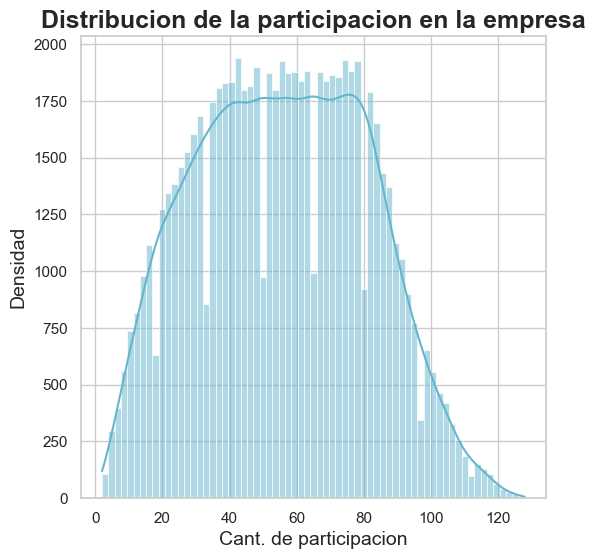

In [99]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(6, 6))
ax = sns.histplot(datos['Company Tenure'], kde = True, color = 'c')
plt.title('Distribucion de la participacion en la empresa', fontsize = 18, fontweight="bold")
plt.xlabel("Cant. de participacion", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.show()

In [100]:
pd.DataFrame(datos['Company Tenure'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Company Tenure,74498.0,55.727456,25.399349,2.0,36.0,56.0,76.0,128.0


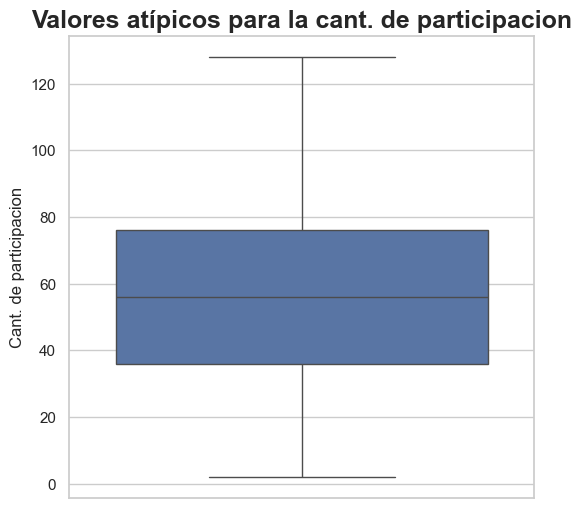

In [101]:
plt.figure(figsize=(6,6))
sns.boxplot(y=datos['Company Tenure'])
plt.title("Valores atípicos para la cant. de participacion", fontsize=18, fontweight="bold")
plt.ylabel("Cant. de participacion")
plt.show()

---
$\textbf{Analisis}$

----

Comentarios de los graficos:

+ En el Primer graficos se observa la distribucion de los datos para la variable mencionada 
+ En el grafico de abajo se muestran los outliers o valores atipicos para la variable mencionada la cual no presenta outliers

----
##  $\textbf{Analisis para las variables convertidas de tipo obj a tipo int}$
---

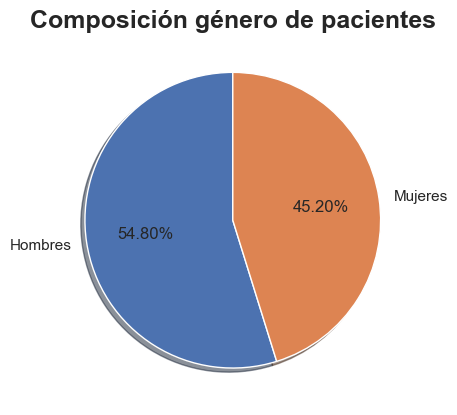

In [102]:
clases = np.array([datos[datos.Gender == 1].shape[0],
                   datos[datos.Gender == 2].shape[0]])
labels = ['Hombres', 'Mujeres']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Composición género de pacientes', fontsize=18, fontweight="bold")
plt.show()

---
$\textbf{Analisis}$

Comentarios del grafico de torta:

+ Se muestra la distribucion de los datos siendo para este caso mas hombres que mujeres en la empresa

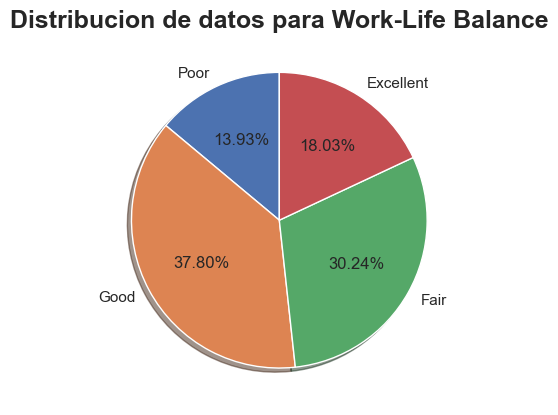

In [103]:
clases = np.array([datos[datos['Work-Life Balance'] == 1].shape[0],
                   datos[datos['Work-Life Balance'] == 2].shape[0],
                   datos[datos['Work-Life Balance'] == 3].shape[0],
                   datos[datos['Work-Life Balance'] == 4].shape[0]])
labels = ['Poor', 'Good', 'Fair', 'Excellent']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Distribucion de datos para Work-Life Balance', fontsize=18, fontweight="bold")
plt.show()

---
$\textbf{Analisis}$

Comentarios del grafico de torta:

+ Se muestra la distribucion de los datos para Work-Life Balance predominando el estado "Good" y "Fair"

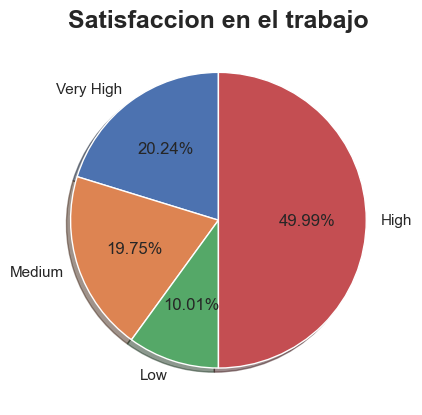

In [104]:
clases = np.array([datos[datos['Job Satisfaction'] == 1].shape[0],
                   datos[datos['Job Satisfaction'] == 2].shape[0],
                   datos[datos['Job Satisfaction'] == 3].shape[0],
                   datos[datos['Job Satisfaction'] == 4].shape[0]])
labels = ['Very High', 'Medium', 'Low', 'High']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Satisfaccion en el trabajo', fontsize=18, fontweight="bold")
plt.show()

---
$\textbf{Analisis}$

Comentarios del grafico de torta:

+ Se muestra la distribucion de los datos para satisfaccion en el trabajo siendo "high" la predominante

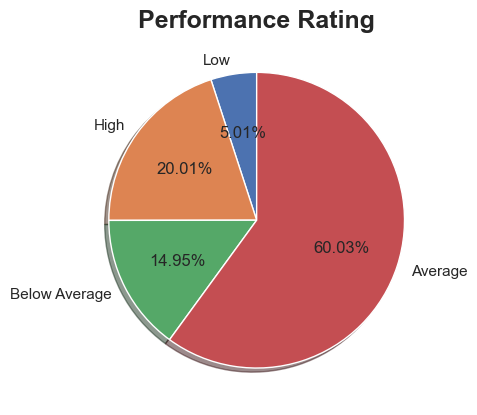

In [105]:
clases = np.array([datos[datos['Performance Rating'] == 1].shape[0],
                   datos[datos['Performance Rating'] == 2].shape[0],
                   datos[datos['Performance Rating'] == 3].shape[0],
                   datos[datos['Performance Rating'] == 4].shape[0]])
labels = ['Low', 'High', 'Below Average', 'Average']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Performance Rating', fontsize=18, fontweight="bold")
plt.show()

---
$\textbf{Analisis}$

Comentarios del grafico de torta:

+ Se muestra la distribucion de los datos para Performance Rating siendo "Average" la predominante 

<function matplotlib.pyplot.show(close=None, block=None)>

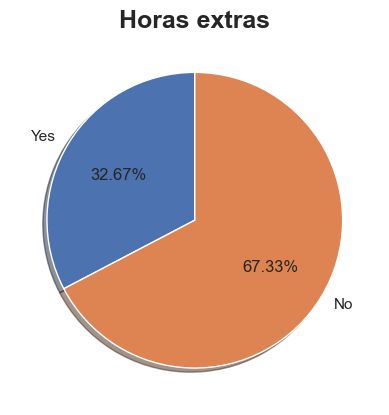

In [106]:
clases = np.array([datos[datos.Overtime == 1].shape[0],
                   datos[datos.Overtime == 2].shape[0]
                   ])
labels = ['Yes', 'No']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Horas extras', fontsize=18, fontweight="bold")
plt.show

---
$\textbf{Analisis}$

Comentarios del grafico de torta:

+ Se muestra la distribucion de los datos para Horas extras siendo la mayoria que la mayoria de los trabajadores no poseen o no hacen horas extras

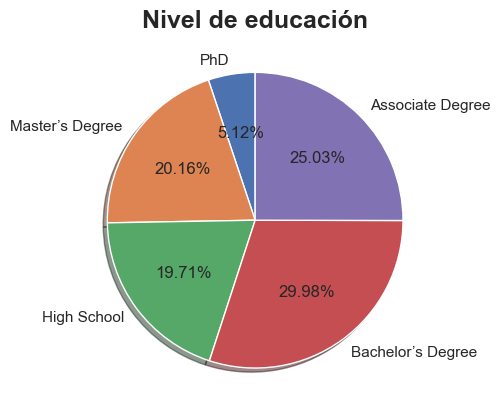

In [107]:
clases = np.array([datos[datos['Education Level'] == 1].shape[0],
                   datos[datos['Education Level'] == 2].shape[0],
                   datos[datos['Education Level'] == 3].shape[0],
                   datos[datos['Education Level'] == 4].shape[0],
                   datos[datos['Education Level'] == 5].shape[0]])
labels = ['PhD', 'Master’s Degree', 'High School', 'Bachelor’s Degree', 'Associate Degree']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Nivel de educación', fontsize=18, fontweight="bold")
plt.show()

---
$\textbf{Analisis}$

Comentarios del grafico de torta:

+ Se muestra la distribucion de los datos para Education Level siendo mas o menos iguales las distribuciones pero predominando ligeramente "Bachelor's Degree"

<function matplotlib.pyplot.show(close=None, block=None)>

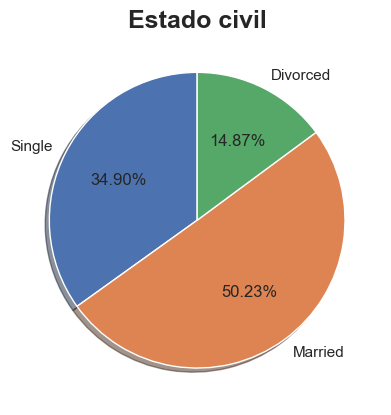

In [108]:
clases = np.array([datos[datos['Marital Status'] == 1].shape[0],
                   datos[datos['Marital Status'] == 2].shape[0],
                   datos[datos['Marital Status'] == 3].shape[0],])
labels = ['Single', 'Married', 'Divorced']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Estado civil', fontsize=18, fontweight="bold")
plt.show

---
$\textbf{Analisis}$

Comentarios del grafico de torta:

+ Se muestra la distribucion de los datos para el Marital Status  siendo la mayoria de los trabajadores casados 

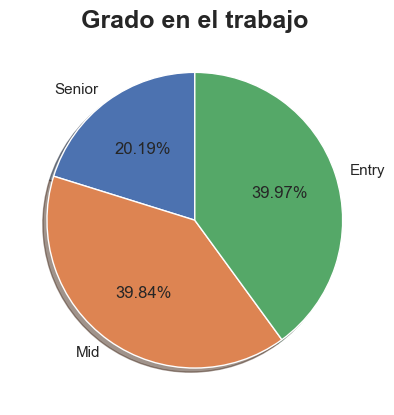

In [109]:
clases = np.array([datos[datos['Job Level'] == 1].shape[0],
                   datos[datos['Job Level'] == 2].shape[0],
                   datos[datos['Job Level'] == 3].shape[0],])
labels = ['Senior', 'Mid', 'Entry']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Grado en el trabajo', fontsize=18, fontweight="bold")
plt.show()

---
$\textbf{Analisis}$

Comentarios del grafico de torta:

+ Se muestra la distribucion de los datos para Job Level con la distribucion entre "Entry" y Mid" siendo practicamente iguales y los seniors menores en cantidad

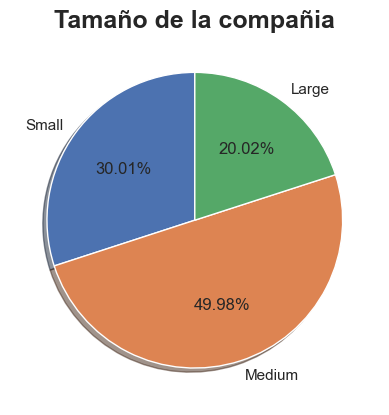

In [110]:
clases = np.array([datos[datos['Company Size'] == 1].shape[0],
                   datos[datos['Company Size'] == 2].shape[0],
                   datos[datos['Company Size'] == 3].shape[0],])
labels = ['Small', 'Medium', 'Large']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Tamaño de la compañia', fontsize=18, fontweight="bold")
plt.show()

---
$\textbf{Analisis}$

Comentarios del grafico de torta:

+ Se muestra la distribucion de los datos para Company Size Predominando el "Medium"

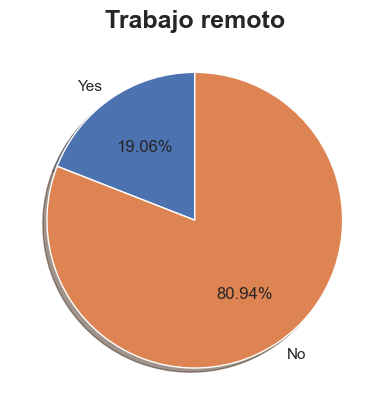

In [111]:
clases = np.array([datos[datos['Remote Work'] == 1].shape[0],
                   datos[datos['Remote Work'] == 2].shape[0],])
labels = ['Yes', 'No']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Trabajo remoto', fontsize=18, fontweight="bold")
plt.show()

---
$\textbf{Analisis}$

Comentarios del grafico de torta:

+ Se muestra la distribucion de los datos para Remote Work con una distribucion bastante desequilibrada y predominando en gran medida el trabajo presencial

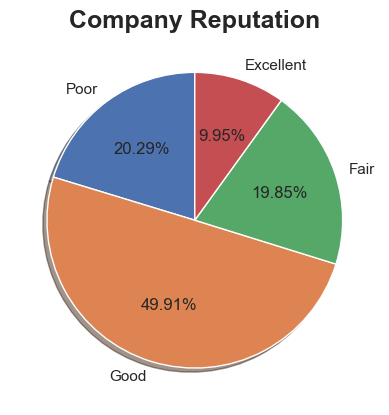

In [112]:
clases = np.array([datos[datos['Company Reputation'] == 1].shape[0],
                   datos[datos['Company Reputation'] == 2].shape[0],
                   datos[datos['Company Reputation'] == 3].shape[0],
                   datos[datos['Company Reputation'] == 4].shape[0]])
labels = ['Poor', 'Good', 'Fair', 'Excellent']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Company Reputation', fontsize=18, fontweight="bold")
plt.show()

---
$\textbf{Analisis}$

Comentarios del grafico de torta:

+ Se muestra la distribucion de los datos para Company Reputation predominando "good"

In [113]:
#Matriz de correlación
numeric_datos_dummies2 = datos_dummies.select_dtypes(include=['number', 'int64'])
corr_matrix = numeric_datos_dummies2.corr()
corr_matrix["Attrition"].sort_values(ascending=False)

Attrition                   1.000000
Job Level                   0.315289
Remote Work                 0.221191
Gender                      0.100637
Distance from Home          0.093836
Education Level             0.051912
Innovation Opportunities    0.021548
Leadership Opportunities    0.011995
Job Role                    0.010433
Employee ID                 0.001935
Employee Recognition       -0.006460
Monthly Income             -0.010687
Company Size               -0.024118
Company Tenure             -0.028964
Performance Rating         -0.032360
Company Reputation         -0.036295
Job Satisfaction           -0.050305
Age                        -0.050801
Overtime                   -0.056019
Work-Life Balance          -0.063416
Years at Company           -0.065388
Number of Dependents       -0.074606
Number of Promotions       -0.081184
Marital Status             -0.228803
Name: Attrition, dtype: float64

---- 
$\textbf{Analisis}$

+ Se muestran las correlaciones de las variables con la variable objetivo "Attrition"

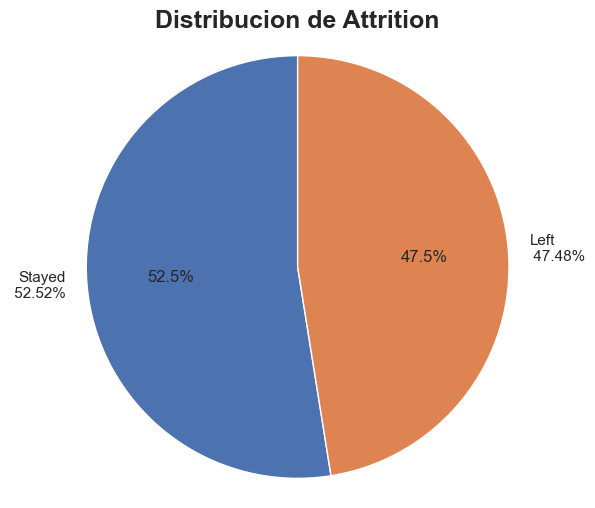

In [114]:

clases = np.array([datos[datos.Attrition == 0].shape[0],  # Stayed
                   datos[datos.Attrition == 1].shape[0]]) # Left

# Validamos que no haya valores NaN o 0 en las clases
if np.any(np.isnan(clases)) or np.sum(clases) == 0:
    print("Error: Hay valores NaN o las clases están vacías.")
else:
    labels = [str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%' for x in clases]
    labels[0] = 'Stayed\n ' + labels[0]
    labels[1] = 'Left\n ' + labels[1]

    # Crear el gráfico de torta
    plt.figure(figsize=(6, 6))
    plt.pie(clases, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title('Distribucion de Attrition', fontsize=18, fontweight="bold")
    plt.axis('equal')  # Para que el gráfico de torta sea un círculo
    plt.show()

---- 
$\textbf{Analisis}$

+ Se muestra la distribucion de la variable Attrition, la cual es mas o menos pareja con un sesgo casi inexistente 

## Fase 3 - Preparación de datos

## Se eliminaran los Outliers para las variables que poseeian

In [115]:
# Calcular los límites inferior y superior para los valores atípicos
Q1 = datos['Years at Company'].quantile(0.25)
Q3 = datos['Years at Company'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores atípicos
outliers = datos[(datos['Years at Company'] < lower_bound) | (datos['Years at Company'] > upper_bound)]

# Eliminar los valores atípicos del DataFrame
datos_cleaned = datos[~((datos['Years at Company'] < lower_bound) | (datos['Years at Company'] > upper_bound))]

# Mostrar la cantidad de datos eliminados
num_outliers = outliers.shape[0]
print(f"Cantidad de datos eliminados: {num_outliers}")

Cantidad de datos eliminados: 338


In [116]:
# Calcular los límites inferior y superior para los valores atípicos de "Monthly Income"
Q1_income = datos['Monthly Income'].quantile(0.25)
Q3_income = datos['Monthly Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

# Filtrar los valores atípicos
outliers_income = datos[(datos['Monthly Income'] < lower_bound_income) | (datos['Monthly Income'] > upper_bound_income)]

# Eliminar los valores atípicos del DataFrame
datos_cleaned_income = datos[~((datos['Monthly Income'] < lower_bound_income) | (datos['Monthly Income'] > upper_bound_income))]

# Mostrar la cantidad de datos eliminados
num_outliers_income = outliers_income.shape[0]
print(f"Cantidad de datos eliminados: {num_outliers_income}")

Cantidad de datos eliminados: 65


## Fase 4 - Modelamiento

### Modelos Línea base

+ ***Acá todos los modelos deben tener un accuracy y roc_auc mayor o igual a 0.7***
+ Se deben incluir las métricas: acuracy, precision, recall, f1-score, matriz de confusión y roc_auc

In [117]:
#Codificar la variable objetivo (Attrition)
var_objetivo = LabelEncoder()
datos_dummies["Attrition"] = var_objetivo.fit_transform(datos_dummies["Attrition"])
datos_dummies.Attrition.unique()

array([0, 1])

In [118]:
datos_dummies.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,5,5390,4,2,4,2,...,0,2,2,89,2,2,2,4,1,0
1,64756,59,2,4,2,5534,1,4,1,3,...,3,2,2,21,2,2,2,3,2,0
2,30257,24,2,10,3,8159,2,4,1,0,...,3,2,2,74,2,2,2,1,2,0
3,65791,36,2,7,5,3989,2,4,2,1,...,2,2,1,50,1,2,2,2,1,0
4,65026,56,1,41,5,4821,3,1,4,0,...,0,1,2,68,2,2,2,3,1,0


In [119]:
# Seleccionar las variables mas importantes respecto a la matriz de correlación
X = datos_dummies[corr_matrix["Attrition"].sort_values(ascending=False).index[1:]]
y = datos_dummies['Attrition']
best = SelectKBest(k=13)
X_new = best.fit_transform(X, y)
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Job Level', 'Remote Work', 'Gender', 'Distance from Home',
       'Education Level', 'Job Satisfaction', 'Age', 'Overtime',
       'Work-Life Balance', 'Years at Company', 'Number of Dependents',
       'Number of Promotions', 'Marital Status'],
      dtype='object')


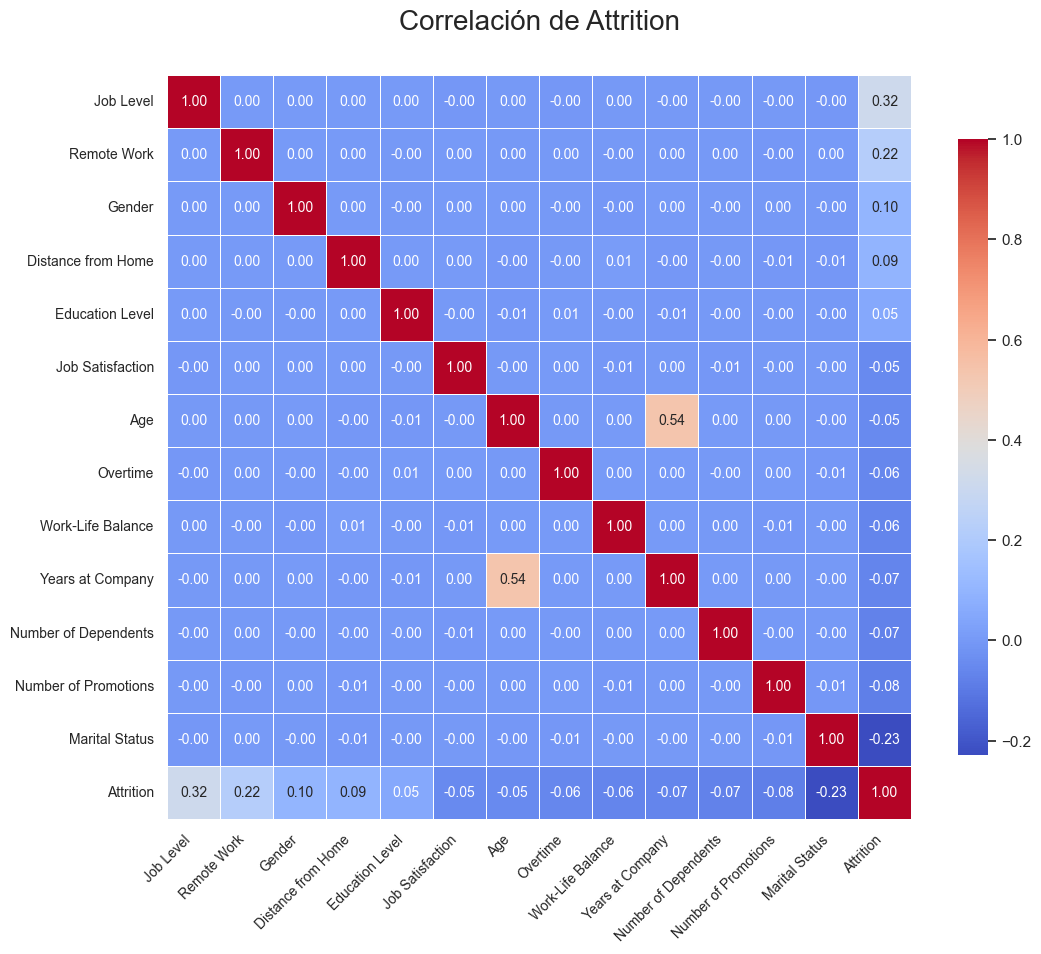

In [120]:
# Matriz de correlación de las variables seleccionadas
used_features = X.columns[selected]
features_corr = np.append(used_features, ['Attrition'])
colormap = plt.cm.coolwarm  

plt.figure(figsize=(12, 10))
plt.title('Correlación de Attrition', y=1.05, size=20)
sns.heatmap(
    datos_dummies[features_corr].astype(float).corr(),
    annot=True,
    fmt=".2f",  
    linewidths=0.5, 
    vmax=1.0,
    square=True,
    cmap=colormap,
    linecolor='white',
    cbar_kws={"shrink": 0.8},  
    annot_kws={"size": 10}  
)

# Ajustes adicionales de fuente para mayor claridad
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.yticks(fontsize=10)

plt.show()


In [121]:
# Se seleccionan las variables objetivos
target_names = np.sort(datos_dummies['Attrition'].unique())

In [122]:
# Separación en data de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29, shuffle=True, stratify = y)

In [123]:
# Sirve para ver la distribución de la variable objetivo en los conjuntos de entrenamiento y test
def ver_matriz(matriz_x: np.array, target_names: np.array, ax, title="Matriz de confusión") -> None:
    """Visualiza una matriz de confusión en un subplot dado por ax."""
    clases = target_names
    group_counts = ["{0:0.0f}".format(value) for value in matriz_x.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in matriz_x.flatten() / matriz_x.sum()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(len(target_names), len(target_names))

    sns.heatmap(matriz_x, annot=labels, fmt='', cmap='Blues',
                xticklabels=clases, yticklabels=clases, ax=ax)

    ax.set_title(title, fontsize=12, fontweight="bold")
    ax.set_xlabel("PREDICCIÓN", fontsize=10)
    ax.set_ylabel("REAL", fontsize=10)

In [124]:
# recordar las variables objetivo 0 = stayed, 1 = left
target_names 

array([0, 1])

In [125]:
# Diccionario para guardar los modelos entrenados
modelos = {
    'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=10000),
    'Naive Bayes' : GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier(max_depth=10, criterion = "entropy", random_state=29),
    'Random Forest': RandomForestClassifier(n_estimators=40, criterion = "entropy", random_state=29)
}

In [126]:
# Crear un diccionario para almacenar los resultados
metricas_resultado = {
    'Algoritmo': [],
    'Exactitud Entrenamiento': [],
    'Exactitud Prueba': [],
    'Recall': [],
    'Precisión (%)': [],
    'F1-Score (%)': [],
    'ROC-AUC (%)': []
}

matriz_confusion = {}
historial_accuracy = {}
historial_roc_auc = {}

for nombre_modelo, modelo in modelos.items():
    pipeline = Pipeline(steps=[('modelo', modelo)])
    pipeline.fit(X_train, y_train)
    pred_train = pipeline.predict(X_train)
    pred_test = pipeline.predict(X_test)
    pred_proba = pipeline.predict_proba(X_test)
    
    matriz_confusion[nombre_modelo] = confusion_matrix(y_test, pred_test)
    historial_accuracy[nombre_modelo] = accuracy_score(y_test, pred_test)
    
    # Calcular métricas
    exactitud_entrenamiento = accuracy_score(y_train, pred_train)
    exactitud_prueba = accuracy_score(y_test, pred_test)
    y_binario = label_binarize(y_test, classes=[0, 1, 2, 3])
    auc_roc = roc_auc_score(y_binario, pred_proba, multi_class='ovr')
    reporte_clasificacion = classification_report(y_test, pred_test, output_dict=True)
    
    historial_roc_auc[nombre_modelo] = auc_roc
    
    # Agregar resultados al diccionario
    metricas_resultado['Algoritmo'].append(nombre_modelo)
    metricas_resultado['Exactitud Entrenamiento'].append(exactitud_entrenamiento)
    metricas_resultado['Exactitud Prueba'].append(exactitud_prueba)
    metricas_resultado['Recall'].append(reporte_clasificacion['weighted avg']['recall'])
    metricas_resultado['Precisión (%)'].append(reporte_clasificacion['weighted avg']['precision'] * 100)
    metricas_resultado['F1-Score (%)'].append(reporte_clasificacion['weighted avg']['f1-score'] * 100)
    metricas_resultado['ROC-AUC (%)'].append(auc_roc * 100)

# Convertir el diccionario en un DataFrame
df_metricas = pd.DataFrame(metricas_resultado)

# Ajustar la columna "Algoritmo" para alinear las columnas
max_longitud_nombre = df_metricas['Algoritmo'].str.len().max()
df_metricas['Algoritmo'] = df_metricas['Algoritmo'].str.ljust(max_longitud_nombre + 4)

# Cambiar el nombre de la columna "Algoritmo" para que esté alineado a la izquierda
df_metricas.columns = ['Algoritmo'.ljust(max_longitud_nombre + 4)] + df_metricas.columns[1:].tolist()


In [127]:
# Imprimir el DataFrame sin índices
print(df_metricas.to_string(index=False))

Algoritmo                     Exactitud Entrenamiento  Exactitud Prueba   Recall  Precisión (%)  F1-Score (%)  ROC-AUC (%)
Logistic Regression                          0.711215          0.711477 0.711477      71.150263     71.148903    78.820056
Naive Bayes                                  0.702658          0.703624 0.703624      70.666288     70.369275    77.830418
Decision Tree Classifier                     0.752995          0.732685 0.732685      73.277912     73.272455    80.691753
Random Forest                                0.999748          0.740671 0.740671      74.051412     74.034120    82.709584


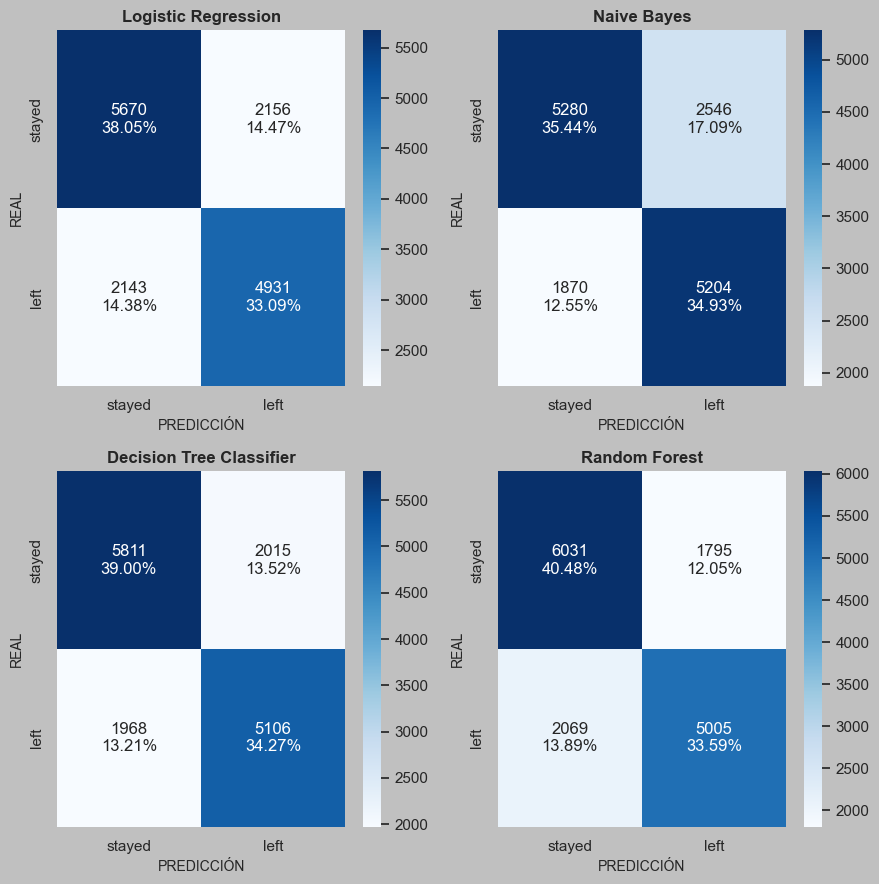

In [128]:
# Muestra las 4 matrices en un solo gráfico
fig, axes = plt.subplots(2, 2, figsize=(9, 9), facecolor='silver')

# Etiquetas personalizadas
etiquetas = ['stayed', 'left']

# Iterar sobre las matrices y mostrarlas en los subplots
for ax, (nombre_modelo, matriz) in zip(axes.flat, matriz_confusion.items()):
    ver_matriz(matriz, etiquetas, ax, title=nombre_modelo)

plt.tight_layout()
plt.show()

### Modelos línea base mejorada

+ ***Acá todos los modelos deben tener un roc_auc mayor o igual a 0.78***
+ Se deben incluir las métricas: acuracy, precision, recall, f1-score, matriz de confusión y roc_auc

In [129]:
# separar datos de entrenamiento y test
X_cv = datos_dummies.drop(['Attrition'], axis=1)
y_cv = datos_dummies['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [130]:
# Diccionario para guardar los modelos entrenados (son los mismos hiperparámetros usandos anteriormente)
modelos_cv = {
    'Logistic Regression_cv': LogisticRegression(solver='liblinear', max_iter=4000),
    'Naive Bayes_cv' : GaussianNB(),
    'Decision Tree_cv Classifier': DecisionTreeClassifier(max_depth=3, criterion = "entropy", random_state=29),
    'Random Forest_cv': RandomForestClassifier(n_estimators=50, criterion = "entropy", random_state=29)
}

In [131]:


# Diccionarios para almacenar métricas
confusion_matrices = {}
model_accuracy = {}
model_roc_auc = {}

# Lista para almacenar resultados detallados
resultados_cv = []


# Iterar sobre cada modelo en el diccionario modelos_cv
for model_name, classifier in modelos_cv.items():
    print(f"Entrenando y evaluando el modelo {model_name} ...")

    # Configurar y entrenar pipeline
    model_pipeline = Pipeline(steps=[('classifier', classifier)])
    model_pipeline.fit(X_train, y_train)

    # Obtener predicciones y matriz de confusión
    y_predictions = model_pipeline.predict(X_test)
    confusion_matrices[model_name] = confusion_matrix(y_test, y_predictions)
    
    # Calcular y almacenar exactitud (accuracy)
    model_accuracy[model_name] = accuracy_score(y_test, y_predictions)
  
    # Cálculo de otras métricas: exactitud en entrenamiento, precisión, recall y F1-Score
    train_accuracy = model_pipeline.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, y_predictions)
    recall_metric = recall_score(y_test, y_predictions, average="weighted")
    precision_metric = precision_score(y_test, y_predictions, average="weighted") * 100
    f1_metric = f1_score(y_test, y_predictions, average="weighted") * 100

    # Cálculo de roc_auc_score si el modelo permite predict_proba
    if hasattr(classifier, 'predict_proba'):
        y_probabilities = model_pipeline.predict_proba(X_test)
        
        # Convertir y_test a formato binarizado
        binarizer = LabelBinarizer()
        binarizer.fit(y_train)  # Para asegurarse de incluir todas las clases
        y_binarized = binarizer.transform(y_test)
        
        # Ajuste para problemas binarios
        if y_binarized.shape[1] == 1:
            y_binarized = np.hstack((1 - y_binarized, y_binarized))

        # Alineación de dimensiones
        if y_binarized.shape[1] != y_probabilities.shape[1]:
            print(f"Ajustando dimensiones de probabilidad para el modelo {model_name}.")
            missing_cols = y_binarized.shape[1] - y_probabilities.shape[1]
            y_probabilities = np.hstack([y_probabilities, np.zeros((y_probabilities.shape[0], missing_cols))])
        
        roc_auc_metric = roc_auc_score(y_binarized, y_probabilities, multi_class='ovr')
    else:
        print(f"{model_name} no admite predict_proba, roc_auc no se calculará.")
        roc_auc_metric = np.nan
    
    model_roc_auc[model_name] = roc_auc_metric

    # Realizar validación cruzada y calcular métricas
    cv_metrics = cross_validate(
        model_pipeline, X_train, y_train, cv=7,
        scoring={'accuracy': 'accuracy', 'roc_auc': 'roc_auc_ovr'}
    )

    # Promediar métricas de validación cruzada
    avg_accuracy_cv = np.mean(cv_metrics['test_accuracy'])
    avg_roc_auc_cv = np.mean(cv_metrics['test_roc_auc'])

    # Almacenar resultados en la lista de evaluación
    resultados_cv.append({
        'Modelo': model_name,
        'Accuracy Entrenamiento': train_accuracy,
        'Accuracy Prueba': test_accuracy,
        'Recall': recall_metric,
        'Precision (%)': precision_metric,
        'F1-Score (%)': f1_metric,
        'ROC-AUC (%)': np.ceil(avg_roc_auc_cv * 100)
    })
    
    df_resultados = pd.DataFrame(resultados_cv)


Entrenando y evaluando el modelo Logistic Regression_cv ...
Entrenando y evaluando el modelo Naive Bayes_cv ...
Entrenando y evaluando el modelo Decision Tree_cv Classifier ...
Entrenando y evaluando el modelo Random Forest_cv ...


In [132]:
print(df_resultados.to_string(index=False))

                     Modelo  Accuracy Entrenamiento  Accuracy Prueba   Recall  Precision (%)  F1-Score (%)  ROC-AUC (%)
     Logistic Regression_cv                0.710762         0.716577 0.716577      71.644713     71.647516         79.0
             Naive Bayes_cv                0.702473         0.708926 0.708926      71.112324     70.897501         78.0
Decision Tree_cv Classifier                0.659720         0.663356 0.663356      71.031562     63.667657         74.0
           Random Forest_cv                0.999815         0.745302 0.745302      74.525219     74.498784         83.0


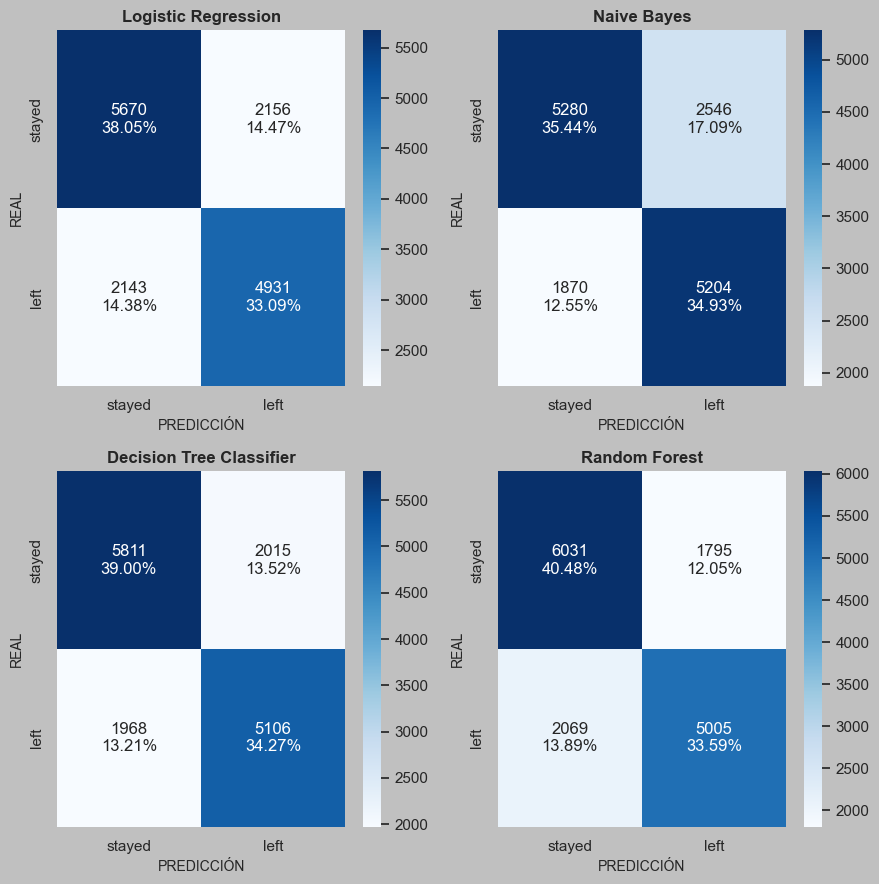

In [133]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9), facecolor='silver')

# Etiquetas personalizadas
etiquetas = ['stayed', 'left']

# Iterar sobre las matrices y mostrarlas en los subplots
for ax, (nombre_modelo, matriz) in zip(axes.flat, matriz_confusion.items()):
    ver_matriz(matriz, etiquetas, ax, title=nombre_modelo)

plt.tight_layout()
plt.show()

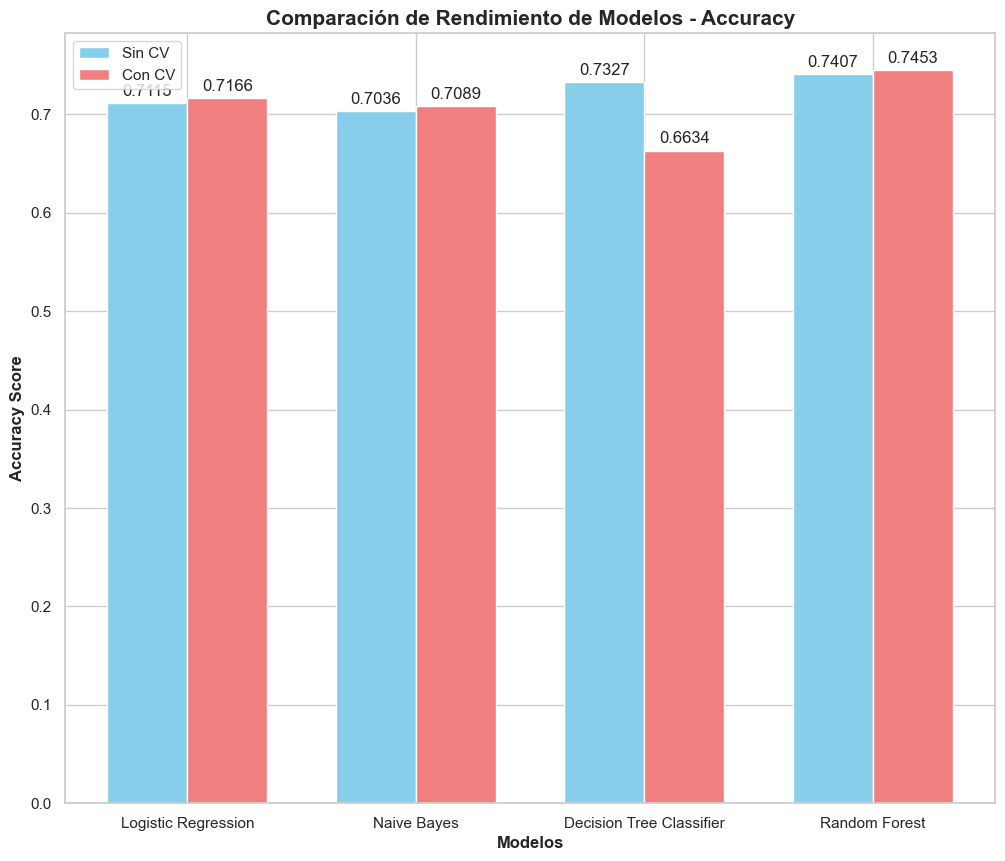

In [134]:
# Preparar datos para la gráfica de Accuracy
modelos = list(historial_accuracy.keys())
valores_sin_cv = list(historial_accuracy.values())
valores_con_cv = list(model_accuracy.values())  

x = np.arange(len(modelos))  # Posiciones de las barras
ancho = 0.35  # Ancho de las barras

# Crear la gráfica de barras agrupadas para Accuracy
fig, ax = plt.subplots(figsize=(12, 10))

barras1 = ax.bar(x - ancho/2, valores_sin_cv, ancho, label='Sin CV', color='skyblue')
barras2 = ax.bar(x + ancho/2, valores_con_cv, ancho, label='Con CV', color='lightcoral')

# Añadir etiquetas, título y leyenda
ax.set_xlabel('Modelos', fontsize=12, fontweight="bold")
ax.set_ylabel('Accuracy Score', fontsize=12, fontweight="bold")
ax.set_title('Comparación de Rendimiento de Modelos - Accuracy', fontsize=15, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.legend()

# Mostrar los valores encima de las barras
for barra in barras1 + barras2:
    altura = barra.get_height()
    ax.annotate(f'{altura:.4f}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar la gráfica
plt.show()


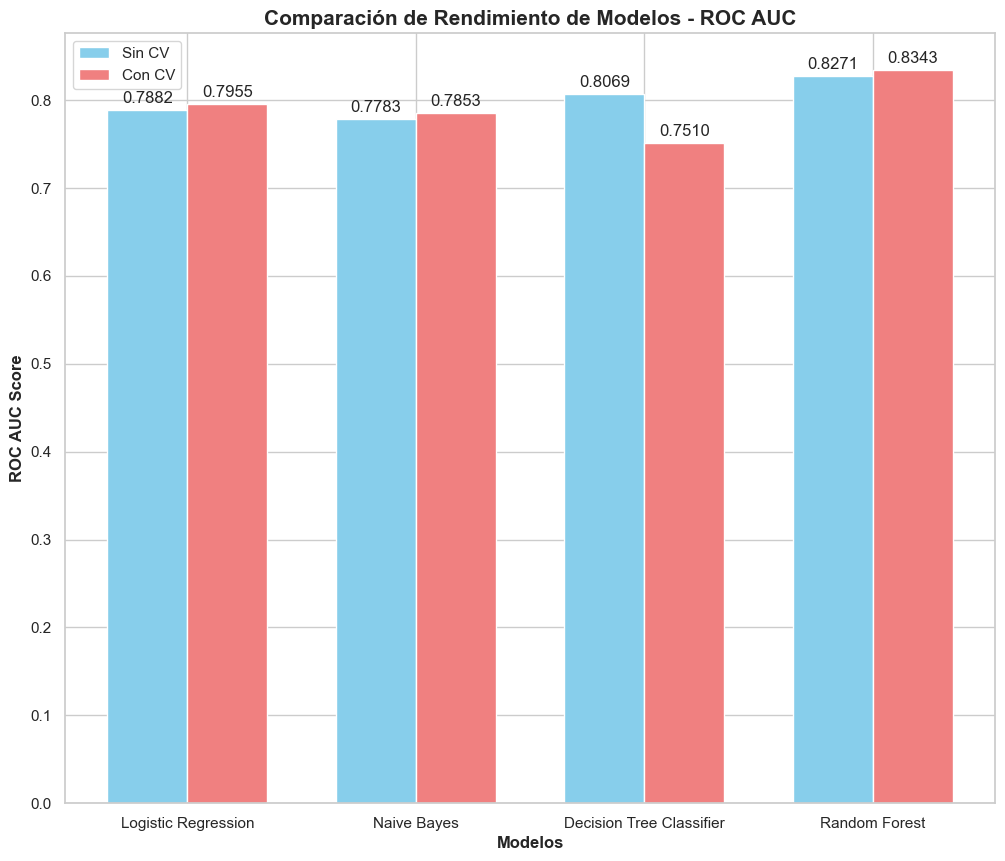

In [135]:
# Preparar datos para la gráfica de ROC AUC
modelos = list(historial_roc_auc.keys())
valores_sin_cv = list(historial_roc_auc.values())
valores_con_cv = list(model_roc_auc.values()) 

x = np.arange(len(modelos))  # Posiciones de las barras
ancho = 0.35  # Ancho de las barras

# Crear la gráfica de barras agrupadas para ROC AUC
fig, ax = plt.subplots(figsize=(12, 10))

barras1 = ax.bar(x - ancho/2, valores_sin_cv, ancho, label='Sin CV', color='skyblue')
barras2 = ax.bar(x + ancho/2, valores_con_cv, ancho, label='Con CV', color='lightcoral')

# Añadir etiquetas, título y leyenda
ax.set_xlabel('Modelos', fontsize=12, fontweight="bold")
ax.set_ylabel('ROC AUC Score', fontsize=12, fontweight="bold")
ax.set_title('Comparación de Rendimiento de Modelos - ROC AUC', fontsize=15, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.legend()

# Mostrar los valores encima de las barras
for barra in barras1 + barras2:
    altura = barra.get_height()
    ax.annotate(f'{altura:.4f}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar la gráfica
plt.show()


## Fase 5 - Evaluación

Acá debe seleccionar el mejor modelo de la línea base mejorada usando una métrica que debe justificar

In [136]:
# Combinar ambos DataFrames
df_combined = pd.concat([df_metricas, df_resultados.rename(columns={'Modelo': 'Algoritmo'})], ignore_index=True)

# Seleccionar el modelo con la mejor "Exactitud Prueba" o "Accuracy Prueba"
df_combined['Exactitud Prueba'] = df_combined['Exactitud Prueba'].fillna(df_combined['Accuracy Prueba'])
best_model = df_combined.loc[df_combined['Exactitud Prueba'].idxmax()]

# Obtener el nombre del modelo
best_model_name = best_model['Algoritmo'] if pd.notna(best_model['Algoritmo']) else df_combined.loc[df_combined['Exactitud Prueba'].idxmax(), 'Algoritmo']

# Crear tabla 
tabla_best_model = pd.DataFrame({
    'Modelo': [best_model_name],
    'accuracy train': [f"{round(best_model['Exactitud Entrenamiento'], 4)}" if pd.notna(best_model['Exactitud Entrenamiento']) else f"{round(best_model['Accuracy Entrenamiento'], 4)}"],
    'accuracy test': [f"{best_model['Exactitud Prueba']:.3f}"],
    'recall': [f"{best_model['Recall']:.2f}"],
    'precision': [f"{best_model['Precisión (%)']:.2f}%" if pd.notna(best_model['Precisión (%)']) else f"{best_model['Precision (%)']:.2f}%"],
    'f1-score': [f"{best_model['F1-Score (%)']:.2f}%"],
    'roc-auc': [f"{best_model['ROC-AUC (%)']:.2f}%"]
})


# Display the DataFrame
display(tabla_best_model)


,Modelo,accuracy train,accuracy test,recall,precision,f1-score,roc-auc
0,Random Forest_cv,0.9998,0.745,0.75,74.53%,74.50%,83.00%


## Deploy

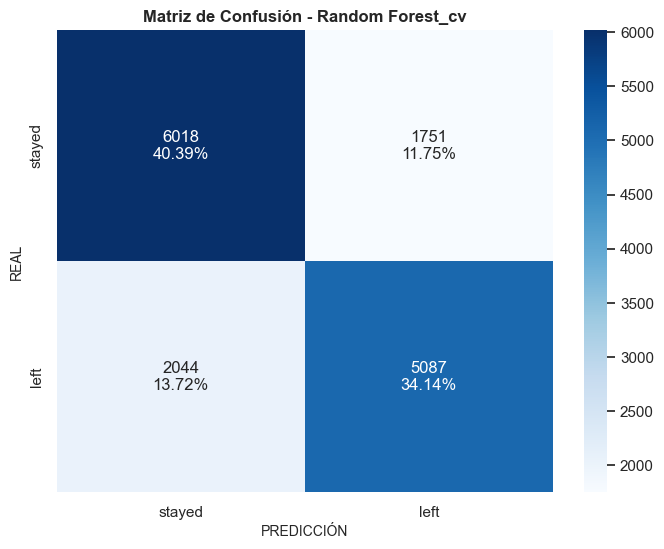

In [137]:
# Obtener el mejor modelo del diccionario de modelos
mejor_modelo = modelos_cv[best_model_name]

# Entrenar el modelo con los datos de entrenamiento
mejor_modelo.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
predicciones = mejor_modelo.predict(X_test)

# Crear la matriz de confusión
matriz_confusion_mejor_modelo = confusion_matrix(y_test, predicciones)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
ver_matriz(matriz_confusion_mejor_modelo, etiquetas, plt.gca(), title=f'Matriz de Confusión - {best_model_name}')
plt.show()

## $\textbf{Analisis sobre las metricas}$

   + Accuracy en el conjunto de entrenamiento (train) y en el conjunto de prueba (test):

      + Accuracy Train: Es la proporción de predicciones correctas que el modelo hace en el conjunto de datos de entrenamiento. Indica qué tan bien el modelo ha aprendido los datos con los que fue entrenado.
    
      + Accuracy Test: Es la proporción de predicciones correctas que el modelo hace en el  conjunto de datos de prueba. Es una medida más importante que la precisión en el entrenamiento porque indica qué tan bien el modelo generaliza a datos nuevos y no vistos.
    
      + Contexto del negocio: Una alta precisión en el conjunto de prueba sugiere que el modelo es efectivo para predecir correctamente si un empleado abandonará la empresa o no en datos nuevos. Esto es crucial para tomar decisiones informadas sobre retención de empleados.

 + Recall:

    + Es la proporción de verdaderos positivos (empleados que realmente abandonaron y fueron correctamente predichos como tales) sobre el total de verdaderos positivos y falsos negativos (empleados que abandonaron pero el modelo no los identificó).

    + Contexto del negocio: Un alto recall es importante porque significa que el modelo está identificando la mayoría de los empleados que abandonarán la empresa. Esto permite a la empresa tomar medidas preventivas para retener a estos empleados.

 + Precision:

    + Es la proporción de verdaderos positivos sobre el total de positivos predichos (verdaderos positivos + falsos positivos).

    + Contexto del negocio: Una alta precisión significa que la mayoría de los empleados predichos como que abandonarán realmente lo harán. Esto es importante para evitar alarmas falsas y no gastar recursos en empleados que no tienen intención de abandonar.

 + F1-Score:

    + Es la media armónica de la precisión y el recall. Proporciona un balance entre ambos, especialmente útil cuando tienes un desequilibrio en las clases (por ejemplo, muchos más empleados que se quedan que los que se van).

    + Contexto del negocio: El F1-score es útil porque equilibra la necesidad de identificar empleados que abandonarán (recall) y la necesidad de evitar falsas alarmas (precision). Es una métrica integral que ayuda a evaluar el rendimiento general del modelo.

 + ROC-AUC:

    + La curva ROC (Receiver Operating Characteristic) es una gráfica que muestra la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos a diferentes umbrales de decisión. El AUC (Área bajo la curva) mide el área total bajo esta curva.

    + Contexto del negocio: Un alto ROC-AUC indica que el modelo es bueno para distinguir entre empleados que abandonarán y los que no. Esto es crucial para la toma de decisiones estratégicas en la gestión del talento y la retención de empleados.
+ Matriz de Confusión:

   + La matriz de confusión es una tabla que permite visualizar el rendimiento de un algoritmo de clasificación. Muestra el número de predicciones correctas e incorrectas desglosadas por cada clase.

   + Contexto del negocio:

      + Verdaderos Negativos (TN): Empleados que no abandonaron y fueron correctamente predichos como que no abandonarán. Esto es positivo porque no se gastan recursos innecesarios en retener a estos empleados.

      + Falsos Positivos (FP): Empleados que no abandonaron pero fueron predichos como que abandonarán. Esto puede llevar a gastar recursos en retener a empleados que no tenían intención de irse.

      + Falsos Negativos (FN): Empleados que abandonaron pero fueron predichos como que no abandonarán. Esto es crítico porque la empresa no tomó medidas para retener a estos empleados, lo que puede resultar en una pérdida de talento.

      + Verdaderos Positivos (TP): Empleados que abandonaron y fueron correctamente predichos como que abandonarán. Esto permite a la empresa tomar medidas preventivas para intentar retener a estos empleados.

      + La matriz de confusión proporciona una visión detallada de cómo se están clasificando los empleados y ayuda a identificar áreas donde el modelo puede estar fallando, permitiendo ajustes y mejoras en el modelo.

 

### $\textbf{Analisis sobre la matriz de confusion del mejor modelo seleccionado}$

+   True Positives (TP):

    Valor: 5087 (34.14%)

    Significado: Estos son los empleados que el modelo predijo correctamente como "left" (se van) y que realmente dejaron la empresa.

    Interpretación: El modelo fue eficaz en identificar a una gran cantidad de empleados que realmente dejaron la empresa. Esta información es crucial para entender los factores que podrían estar relacionados con la deserción y, en consecuencia, mejorar las estrategias de retención.

+   True Negatives (TN):

    Valor: 6018 (40.39%)
    
    Significado: Estos son los empleados que el modelo predijo correctamente como "stayed" (se quedan) y que realmente permanecieron en la empresa.

    Interpretación: La alta proporción de empleados correctamente identificados como "stayed" sugiere que el modelo tiene una buena capacidad para reconocer a aquellos que es poco probable que abandonen la empresa. Esto puede ser útil para asignar menos recursos a programas de retención para este grupo, enfocándose en aquellos con mayor probabilidad de dejar.

+   False Positives (FP):

    Valor: 1751 (11.75%)

    Significado: Estos son los empleados que el modelo predijo como "left" pero que realmente se quedaron.

    Interpretación: Este grupo representa empleados que el modelo consideró erróneamente con alto riesgo de abandono, cuando en realidad decidieron quedarse. Aunque estos errores no representan una pérdida directa, pueden llevar a destinar recursos de retención a empleados que no estaban en riesgo de irse.

+   False Negatives (FN):

    Valor: 2044 (13.72%)

    Significado: Estos son los empleados que el modelo predijo como "stayed" pero que realmente dejaron la empresa.

    Interpretación: Estos errores son críticos para el negocio, ya que representan a los empleados que el modelo no logró   identificar como propensos a abandonar. La empresa no tuvo la oportunidad de intervenir de manera proactiva para retenerlos, lo cual podría tener un impacto negativo en el negocio si estos empleados eran difíciles de reemplazar o tenían un alto valor para la organización.

### $ \textbf{Analisis sobre Existencia o inexistencia de overfitting}$

+ Accuracy en Entrenamiento vs. Prueba:

    + La exactitud en el conjunto de entrenamiento es 0.9998, es decir, casi 100%, lo cual es inusualmente alto y sugiere que el modelo ha aprendido muy bien (o en exceso) los patrones del conjunto de entrenamiento.

    + En contraste, la exactitud en el conjunto de prueba es 0.745, considerablemente más baja, lo que indica que el modelo no generaliza bien cuando se enfrenta a datos nuevos.

+ Conclusion:
    + Dado los resultados obtenidos se podria decir que el modelo esta memorizando los datos de entrenamiento en lugar de generalizar patrones utiles. Por lo que se podria decir que $ \textbf{Si existe overfitting}$ 

### $ \textbf{Analisis sobre la metrica escogida}$


##### La metrica escogida es: $ \textbf{Accuracy}$
#### Justificaciones:

+ Interpretación Sencilla y Comprensible para el Negocio

    + Accuracy es una métrica directa y fácil de entender: indica el porcentaje de predicciones correctas realizadas por el modelo en relación al total. Esto facilita la comunicación de los resultados del modelo a terceros sin tanta compresion de la terminologia.
        
+ Balance entre "Deserción" y "Retención" en los Datos

    + Existe un cierto balance entre empleados que dejan la empresa ("left") y los que se quedan ("stayed") y si el conjunto de datos no está muy desbalanceado entre ambas clases, accuracy es una métrica razonable para evaluar el rendimiento del modelo, ya que refleja de manera justa el porcentaje de empleados que se predicen correctamente en ambas categorías.

+ Objetivo del Negocio: Evaluación General del Rendimiento
    
    + Dado que el objetivo principal del negocio es obtener una evaluación general de cuán bien puede predecir el modelo si un empleado dejará la empresa o se quedará, accuracy proporciona un valor global de rendimiento. Esto ayuda a definir qué tan confiable es el modelo en términos generales y permite una visión inicial de su eficacia.

+ En resumen, accuracy es una métrica adecuada para la selección del mejor modelo en este caso debido a su simplicidad y relevancia para dar una evaluación inicial y general del rendimiento del modelo en ambos tipos de predicción (deserción y retención) 


#### Obtención del mejor modelo usando la métrica seleccionada (recuerde que el roc_auc debe ser mayor a 0.78

In [138]:
# Mejor modelo 
tabla_best_model

,Modelo,accuracy train,accuracy test,recall,precision,f1-score,roc-auc
0,Random Forest_cv,0.9998,0.745,0.75,74.53%,74.50%,83.00%


## Fase 6 - Deployment

In [ ]:
!wget https://raw.githubusercontent.com/Tyrf1ng/Proyecta_IA_2_Entrega/refs/heads/main/Entrega.json

In [ ]:
# Cargar el archivo JSON
with open('Entrega.json', 'r') as file:
    nuevos_trabajadores = json.load(file)

# Convertir los datos JSON a un DataFrame
df_nuevos_trabajadores = pd.DataFrame(nuevos_trabajadores)

df_nuevos_trabajadores['Attrition'] = None

# Transformar los datos categóricos para que coincidan con el formato de los datos de entrenamiento
df_nuevos_trabajadores["Gender"] = df_nuevos_trabajadores["Gender"].replace({"Male": 2, "Female": 1}).infer_objects()
df_nuevos_trabajadores["Job Role"] = df_nuevos_trabajadores["Job Role"].replace({"Education": 5, "Media": 4, "Healthcare": 3, "Technology": 2, "Finance": 1}).infer_objects()
df_nuevos_trabajadores["Work-Life Balance"] = df_nuevos_trabajadores["Work-Life Balance"].replace({"Excellent": 4, "Good": 3, "Fair": 2, "Poor": 1}).infer_objects()
df_nuevos_trabajadores["Job Satisfaction"] = df_nuevos_trabajadores["Job Satisfaction"].replace({"Very High": 4, "High": 3, "Medium": 2, "Low": 1}).infer_objects()
df_nuevos_trabajadores["Performance Rating"] = df_nuevos_trabajadores["Performance Rating"].replace({"High": 4, "Average": 3, "Below Average": 2, "Low": 1}).infer_objects()
df_nuevos_trabajadores["Overtime"] = df_nuevos_trabajadores["Overtime"].replace({"Yes": 1, "No": 0}).infer_objects()
df_nuevos_trabajadores["Marital Status"] = df_nuevos_trabajadores["Marital Status"].replace({"Married": 3, "Divorced": 2, "Single": 1}).infer_objects()
df_nuevos_trabajadores["Job Level"] = df_nuevos_trabajadores["Job Level"].replace({"Senior": 3, "Mid": 2, "Entry": 1}).infer_objects()
df_nuevos_trabajadores["Company Size"] = df_nuevos_trabajadores["Company Size"].replace({"Large": 3, "Medium": 2, "Small": 1}).infer_objects()
df_nuevos_trabajadores["Remote Work"] = df_nuevos_trabajadores["Remote Work"].replace({"Yes": 1, "No": 0}).infer_objects()
df_nuevos_trabajadores["Leadership Opportunities"] = df_nuevos_trabajadores["Leadership Opportunities"].replace({"Yes": 1, "No": 0}).infer_objects()
df_nuevos_trabajadores["Innovation Opportunities"] = df_nuevos_trabajadores["Innovation Opportunities"].replace({"Yes": 1, "No": 0}).infer_objects()
df_nuevos_trabajadores["Education Level"] = df_nuevos_trabajadores["Education Level"].replace({"PhD": 5, "Master’s Degree": 4, "Bachelor’s Degree": 3, "Associate Degree": 2, "High School": 1}).infer_objects()
df_nuevos_trabajadores["Company Reputation"] = df_nuevos_trabajadores["Company Reputation"].replace({"Excellent": 4, "Good": 3, "Fair": 2, "Poor": 1}).infer_objects()
df_nuevos_trabajadores["Employee Recognition"] = df_nuevos_trabajadores["Employee Recognition"].replace({"Very High": 4, "High": 3, "Medium": 2, "Low": 1}).infer_objects()

# Seleccionar las columnas necesarias excluyendo 'Attrition'
X_nuevos_trabajadores = df_nuevos_trabajadores.drop(columns=['Attrition'])

X_nuevos_trabajadores = X_nuevos_trabajadores[X.columns]

# Crear una lista para almacenar los resultados
resultados = []

# Iterar sobre cada fila del DataFrame y hacer las predicciones usando el mejor modelo
for index, row in X_nuevos_trabajadores.iterrows():
    row_df = pd.DataFrame([row], columns=X_nuevos_trabajadores.columns)

    # Realizar la predicción con el mejor modelo
    prediccion = mejor_modelo.predict(row_df)[0]
    
    # Crear un diccionario para almacenar las variables independientes y la predicción
    resultado = {
        "Employee ID": int(df_nuevos_trabajadores.iloc[index]["Employee ID"]),
        "Attrition_Pred": int(prediccion)  # Convertir la predicción a int
    }
    
    # Añadir solo las columnas que existen en `row`
    for col in row.index:
        valor = row[col].item() if isinstance(row[col], pd.Series) else row[col]
        resultado[col] = int(valor) if isinstance(valor, (np.integer, np.int64)) else valor  # Convertir a tipo nativo
    
    # Añadir el resultado a la lista
    resultados.append(resultado)

# Guardar los resultados en un archivo JSON
with open('Predicciones.json', 'w') as json_file:
    json.dump(resultados, json_file, indent=4)

print("Resultados guardados en Predicciones.json")

Resultados guardados en Predicciones.json


# Pregunta

¿Recomendarían el modelo seleccionado?

Si la respuesta a la pregunta anterior es afirmativa: ¿Cuál es la razón por la cual lo recomendarían?

Si la respuesta a la pregunta es negativa: ¿Cuál es la alternativa propuesta?

#### $ \textbf{Respuesta Preguntas}$

+   Si, recomendamos el mejor modelo seleccionado.

+ 
    Lo recomendamos ya que de acuerdo con las metricas observadas(accuracy, recall, precision, F1-score y ROC-AUC), Random Forest ha demostrado obtener mejores resultados en comparación con los otros modelos.

    Ademas la alta precisión y el buen recall de Random Forest indican que este modelo es capaz de capturar tanto a los empleados que probablemente se queden como a aquellos que podrían irse, reduciendo el riesgo de errores costosos para la empresa (falsos negativos y falsos positivos).

    Asi tambien lo recomendamos debido a su gran flexibilidad para ajustar el modelo para encontrar el mejor equilibrio entre rendimiento y tiempo de procesamiento, el cual permite ajustar el modelo segun las necesidades del negocio optimizandolo de tal manera que se puedan encontrar los mejores resultados en un contexto de recursos limitados etc...
